- 처리하고자 하는 텍스트(corpus)에 대한 정보를 특정 단위별로 나누는 작업
- 단어, 형태소, 문장 토크나이징(tokenizing)

### 영어 토크나이징

- NLTK(Natural Language Toolkit)과 Spacy가 대표적임

### 1. NLTK
- 파이썬에서 영어 텍스트 전처리 작업을 하는데 많이 쓰이는 라이브러리
- 50여개가 넘는 말뭉치(corpus) 리소스를 활용해 영어 텍스트를 분석할 수 있게 해줌
- 직관적인 함수 사용법으로 빠르게 텍스트 전처리를 할 수 있음

In [1]:
import nltk

In [2]:
nltk.download('all-corpora')

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\relea\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\relea\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\relea\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\relea\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\relea\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\relea\AppData\Roaming\nltk_data..

True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\relea\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
# nlt에서 사용하는 tokenizer = punkt

### 단어 단위 토크나이징

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
sentence = "Natural language processing (NLP) is a subfield of computer science, \
information engineering, and artificial intelligence concerned with the interactions \
between computers and human (natural) languages, in particular how to program computers \
to process and analyze large amounts of natural language data."

In [9]:
print(word_tokenize(sentence))

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']


### 문장 단위 토크나이징

In [10]:
from nltk.tokenize import sent_tokenize

In [11]:
paragraph = "Natural language processing (NLP) is a subfield of computer science, \
information engineering, and artificial intelligence concerned with the interactions \
between computers and human (natural) languages, in particular how to program computers \
to process and analyze large amounts of natural language data. Challenges in natural \
language processing frequently involve speech recognition, natural language \
understanding, and natural language generation."

In [12]:
print(sent_tokenize(paragraph))

['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.', 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.']


### nltk를 활용한 불용어 처리

In [13]:
from nltk.corpus import stopwords

In [14]:
print(len(stopwords.words('english')))

179


In [15]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
stopwords.words('english')[-10:]

['shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [17]:
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(sentence)

result = []
for w in word_tokens:
    if w not in stop_words:
        result.append(w)

In [18]:
print(word_tokens)

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']


In [19]:
print(result)

['Natural', 'language', 'processing', '(', 'NLP', ')', 'subfield', 'computer', 'science', ',', 'information', 'engineering', ',', 'artificial', 'intelligence', 'concerned', 'interactions', 'computers', 'human', '(', 'natural', ')', 'languages', ',', 'particular', 'program', 'computers', 'process', 'analyze', 'large', 'amounts', 'natural', 'language', 'data', '.']


### 2. Spacy

- 상업용 목적으로 만들어진 오픈소스 라이브러리
- 영어를 포함한 8개 국어에 대한 자연어 전처리 모듈을 제공
- 쉬운 설치 및 빠른 전처리

In [20]:
import spacy

In [21]:
nlp = spacy.load('en')

doc = nlp(sentence)                 

In [22]:
word_tokenized_sentence = [token.text for token in doc]
print(word_tokenized_sentence)

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']


In [23]:
sentence_tokenized_list = [sent.text for sent in doc.sents]
print(sentence_tokenized_list)

['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.']


### 한글 토크나이징
- 한글은 언어의 특성상 NLTK나 SPACY는 사용하기에 적합하지 않음
- 영어에 존재하지 않는 형태소 분석이나 음소 분리와 같은 내용은 다루기 어려움

### KoLNPy
- 한글 자연어 처리를 위해 만들어진 오픈소스 라이브러리
- 국내에 이미 만들어져 사용되고 있는 여러 형태소 분석기를 사용할 수 있음
- 자바로 작성된 형태소 분석기를 사용하기 때문에 윈도우에서 KoLNPy를 설치하기 위해서는 Java(1.7이상)가 필요
- 환경변수에 자바홈이 되어있는지 확인
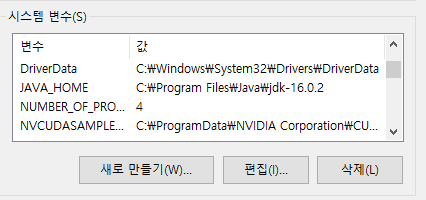
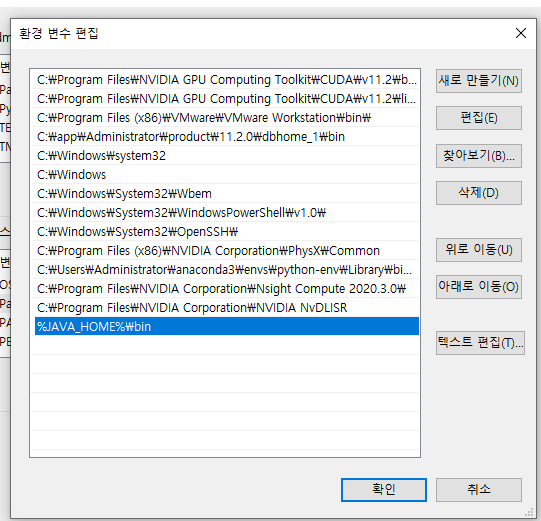
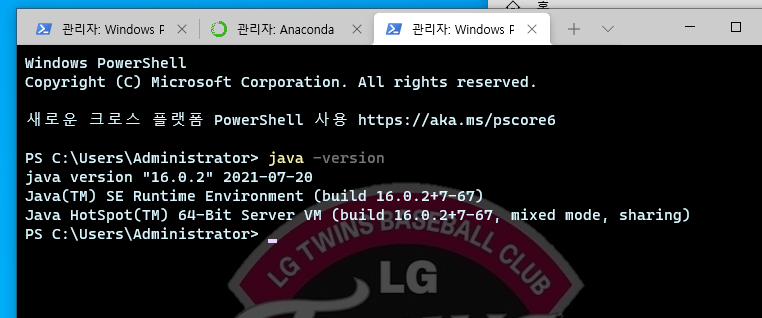
- cmd에서 자바버전 잡히면 완료

In [1]:
import konlpy

### 형태소 단위 토크나이징
- KoLNPy에서는 여러 형태소 분석기를 제공
- 각 형태소 분석기는 클래스 형태로 되어 있고, 이를 객체로 생성한 후 메서드를 호출해서 토크나이징함

### 형태소 분석 및 품사 태깅
- 형태소란 의미를 가지는 가장 작은 단위
- KoLNPy에 객체 형태로 포함되어 있는 형태소 분석기 목록
 - a. Hannanum
 - b. Kkma
 - c. Komoran
 - d. Mecab
 - e. Okt(Twitter)
- 위 객체들은 모두 동일하게 형태소 분석 기능을 제공
- 각기 성능이 조금씩 다름
- Mecab은 윈도우에서 실행 불가능


In [2]:
from konlpy.tag import Hannanum, Kkma, Komoran, Okt

In [4]:
okt = Okt()
text = '한글 자연어 처리는 재밌다 이제부터 열심히 해야지ㅎㅎㅎ'
print(okt.morphs(text))

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']


In [5]:
print(okt.morphs(text, stem=True))

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']


In [6]:
print(okt.pos(text)) # 품사정보를 함꼐 보여줌

[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]


In [7]:
print(okt.pos(text, join=True))

['한글/Noun', '자연어/Noun', '처리/Noun', '는/Josa', '재밌다/Adjective', '이제/Noun', '부터/Josa', '열심히/Adverb', '해야지/Verb', 'ㅎㅎㅎ/KoreanParticle']


In [8]:
kkma = Kkma()
print(kkma.morphs(text))

['한글', '자연어', '처리', '는', '재밌', '다', '이제', '부터', '열심히', '하', '어야지', 'ㅎㅎㅎ']


In [9]:
print(kkma.nouns(text))

['한글', '자연어', '처리', '이제']


In [10]:
print(kkma.pos(text))

[('한글', 'NNG'), ('자연어', 'NNG'), ('처리', 'NNG'), ('는', 'JX'), ('재밌', 'VA'), ('다', 'ECS'), ('이제', 'NNG'), ('부터', 'JX'), ('열심히', 'MAG'), ('하', 'VV'), ('어야지', 'EFN'), ('ㅎㅎㅎ', 'EMO')]


In [11]:
komoran = Komoran()
print(komoran.morphs(text))

['한글', '자연어', '처리', '는', '재밌', '다', '이제', '부터', '열심히', '해야지ㅎㅎㅎ']


In [12]:
print(komoran.nouns(text))

['한글', '자연어', '처리', '이제']


In [13]:
print(komoran.pos(text))

[('한글', 'NNP'), ('자연어', 'NNP'), ('처리', 'NNG'), ('는', 'JX'), ('재밌', 'VA'), ('다', 'EC'), ('이제', 'NNG'), ('부터', 'JX'), ('열심히', 'MAG'), ('해야지ㅎㅎㅎ', 'NA')]


In [14]:
hannanum = Hannanum()
print(hannanum.morphs(text))

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야짛ㅎㅎ']


In [15]:
print(hannanum.nouns(text))

['한글', '자연어', '처리', '재밌다', '해야짛ㅎㅎ']


In [16]:
print(hannanum.pos(text))

[('한글', 'N'), ('자연어', 'N'), ('처리', 'N'), ('는', 'J'), ('재밌다', 'N'), ('이제', 'M'), ('부터', 'J'), ('열심히', 'M'), ('해야짛ㅎㅎ', 'N')]


### KoNLPy 데이터
- 한글 자연어 처리에 활용할 수 있는 한글 데이터를 포함하고 있음
- 데이터의 종류는 다음과 같음
- a. kolaw
- 한국 법률 말뭉치 - 'constitution.txt'파일로 저장되어 있음
- b. kobil
- 대한민국 국회에 발의된 의안 말뭉치
- 각 id값을 가지는 의안으로 구성되어 있고 파일은'1809890.txt'부터 '1809899.txt'까지로 구성되어 있음

In [17]:
from konlpy.corpus import kolaw, kobill

In [18]:
kolaw.open('constitution.txt').read()[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

In [19]:
kobill.open('1809890.txt').read()

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------